In [ ]:
# 머신러닝 구조(패턴)
# 데이터 수집 -> 정제/EDA -> 전처리 -> 데이터분리 
# -> 모델 선정 -> 학습 -> 평가 -> 피드백
# (재학습OR모델변경OR전처리,....) -> (배포)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 수집 및 전처리 (모돌에 학습할 데이터 준비)
# 기본 데이터를 학습 데이터와 테스트데이터로 8:2 준비
# 학습 데이터 X_train(feature), y_train(label) / 테스트 데이터 X_test, y_test
X_train_, X_test, y_train, t_test = train_test_split(
    iris_data, iris_label,
    train_size = 0.8,           # 80% 학습 데이터 사용
    shuffle = False,            # 무작위 섞음 옵션
    stratify= iris_data.label,  # 라벨데이터로 비율을 마춘다
    random_state = 11           # 테스트 시 재현성 확보를 위해
)

# 2. 모델 준비
model = LinearRegression()

# 3. 학습 (준비해놓은 학습데이터 사용)
model.fit(X_train_, y_train)

# 4. 예측 (준비해놓은 테스트데이터 사용)
y_pred = model.predict(X_test)

# 5. 평가
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(mse)
print(r2)

# 시각화


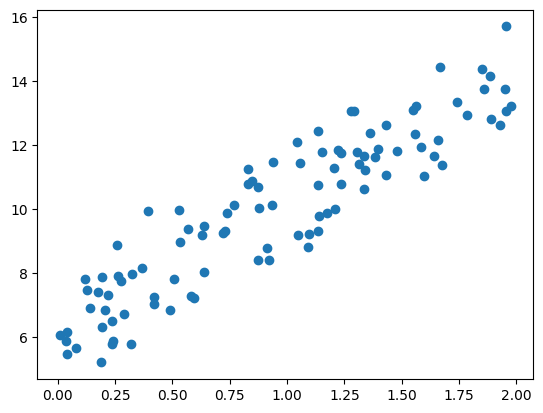

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 0~2까지의 랜덤값 100개
y = 6 + 4 * X + np.random.randn(100, 1) # Y = 6 + 4X + 잡음(Random Noise)

# 데이터 시각화
plt.scatter(X, y)
plt.show()


6.2221510774471165


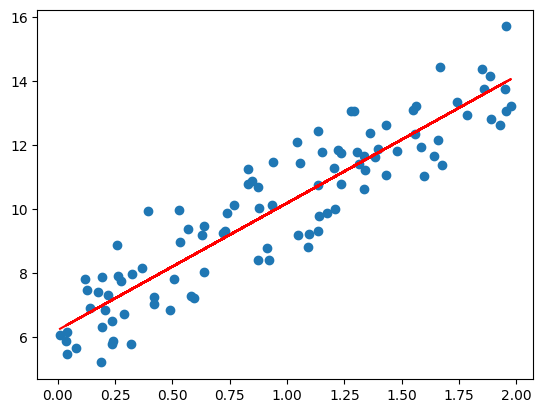

In [ ]:

# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)                                  # 샘플수   
    cost = np.sum(np.square(y - y_pred)) / N    # 평균제곱오차
    return cost

# 가중치(w1, w10) 업데이트 함수 정의
def get_weight_update(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    y_pred = np.dot(X, w1.T) + w0   # 예측값 계산
    diff = y - y_pred               # 오차 계산

    w0_factors = np.ones((N, 1))    # w0 업데이트하는 상수 1 배열

    w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff))  # w1 업데이트 값
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff)) # w0 업데이트 값

    return w1_update, w0_update

# 경사 하강법 함수 정의
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))   # 초기 w0값 설정
    w1 = np.zeros((1, 1))   # 초기 w1값 설정

    # 가중치 업데이트 값 계산
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update     # w1 업데이트 적용
        w0 = w0 - w0_update     # w0 업데이트 적용

    return w1, w0

# 경사 하강법 실행 및 결과 확인
w1, w0 = gradient_descent_steps(X, y, iters=10000)
print(w0[0, 0])  # w0 결과 출력

# 예측값 계산
y_pred = w1[0, 0] * X + w0

# 예측 결과 시각화
plt.scatter(X, y)   # 원본 데이터
plt.plot(X, y_pred, color='r')  # 경사하강법으로 학습된 직선
plt.show()

1. 데이터 만들고
2. 선형모델 만들기
3. 손실 계산
4. 기울기 구하기
5. 파라미터 업데이트
6. 수렴할때까지 반복

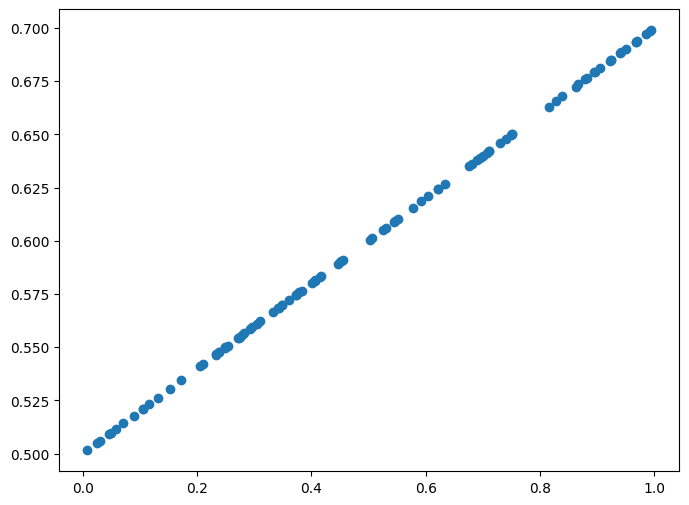

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.random.rand(100)     # 0~1 데이터 100개 생성
y = 0.2 * X + 0.5           # 정답 Y (기울기 0.2, 절편 05인 직선)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X,y)            # 산점도 플롯
plt.show()

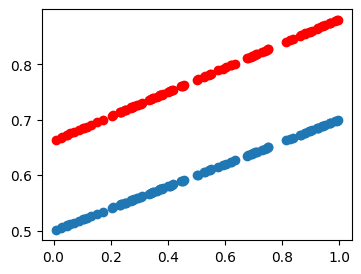

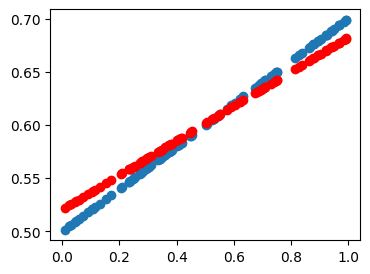

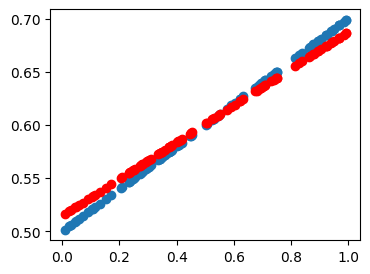

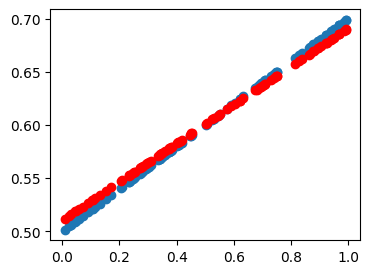

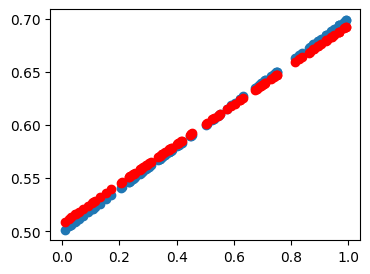

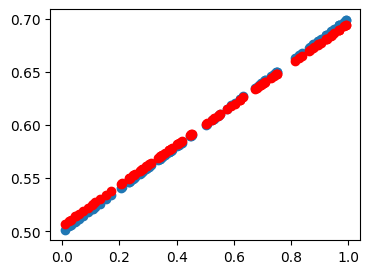

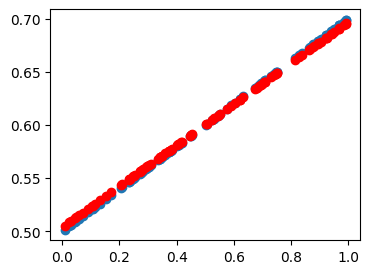

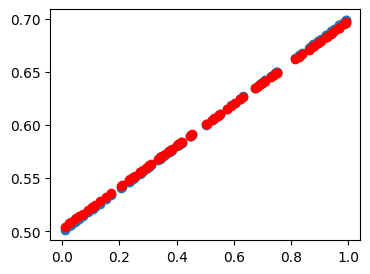

W:  0.19631267227126303
b:  0.5019910602965734


In [ ]:
# 가중치와 편향 초기화
W = np.random.uniform(-1,1) # 가중치 W를 -1~1 사이 랜덤값으로 초기화
b = np.random.uniform(-1,1) # 편향 b를 -1~1 사이 랜덤값으로 초기화

# 에측 결과 시각화 함수
def plot_pred(pred, y):
    plt.figure(figsize=(4,3))
    plt.scatter(X, y)                   # 실제 데이터
    plt.scatter(X, pred, color='red')   # 예측 값 (빨간 점)
    plt.show()
    
# 경사하강법을 통한 학습
lr = 0.5

# 경사하강법 사용해서 가중치와 편향을 업데이트하며 학습 진행
for epoch in range(300):
    y_pred = W * X + b         # 현재 W, b로 예측값 계산
    
    error = np.abs(y_pred - y).mean()   # 예측값과 실제값의 평균 절대오차(MAE)
    
    w_grad = lr * ((y_pred - y) * X).mean()     # W에 대한 기울기 계산 후 학습률 곱하기
    b_grad = lr * (y_pred - y).mean()     # b에 대한 기울기 계산 후 학습률 곱하기
    
    W = W - w_grad  # 가중치 W를 경사하강법으로 업데이트
    b = b - b_grad  # b에 대한 경사하강법으로 업데이트
    
    # 오차가 충분히 작아지면 반복 중단 (조기 종료) = > 스케쥴러
    if error < 0.001:
        break
    
    if epoch % 10 == 0:         # 10번 에폭마다
        y_pred = W * X + b      # 최신 W,b로 다시 예측값 계산
        plot_pred(y_pred,y)     # 얘측결과를 시각화
        
# 최종 학습된 가중치와 편향 확인
print("W: ", W)
print("b: ", b)

기울기(coefficient): 2.0
절편(intercept): -0.20000000000000018
MSE: 0.15999999999999992
R2 Score: 0.9803921568627451


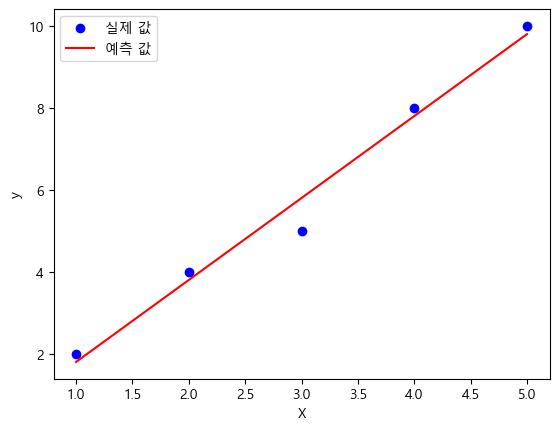

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression   # 선형외귀모델
from sklearn.metrics import mean_squared_error, r2_score    # 평가지표 MSE, R2

plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

# 데이터 생성
X = np.array([[1], [2], [3], [4], [5]]) # 입력값(2차원 형태)
y = np.array([2, 4, 5, 8, 10])          # 실제 출력값

# print(X.shape)
# print(y.shape)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측 값 계산
y_pred = model.predict(X)

# 평가 지표 계산
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'기울기(coefficient): {model.coef_[0]}') # 학습된 기울기 W 출력
print(f'절편(intercept): {model.intercept_}')   # 학습된 절편 b 출력
print(f'MSE: {mse}')                            # MSE (평균제곱오차)
print(f'R2 Score: {r2}')                        # R2 스코어

# 결과 시각화
plt.scatter(X, y, color='blue', label='실제 값')
plt.plot(X, y_pred, color='red', label='예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()        # 범례
plt.show()

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression   # 선형회귀 모델
from sklearn.metrics import mean_squared_error      # MES(평균제곱오차) 

# 데이터 생성
X = np.array([[1, 2100], [2, 2500], [3, 1800], [4, 2200], [5, 1700]])
y = np.array([500, 550, 480, 530, 475])

# 모델 생성
mpdel = LinearRegression()
model.fit(X,y)

# 예측값 계산
y_pred = model.predict(X)

print(y_pred)

print(y)
# 평가 지표 계산
mse = mean_squared_error(y,y_pred)

print(f'기울기(coefficient): {model.coef_[0]}') # 학습된 기울기 W 출력
print(f'절편(intercept): {model.intercept_}')   # 학습된 절편 b 출력
print(f'MSE: {mse}')                            # MSE (평균제곱오차)

[500.77319588 551.08247423 477.78350515 528.09278351 477.26804124]
[500 550 480 530 475]
기울기(coefficient): 5.3608247422680355
절편(intercept): 259.4329896907218
MSE: 3.0927835051547214


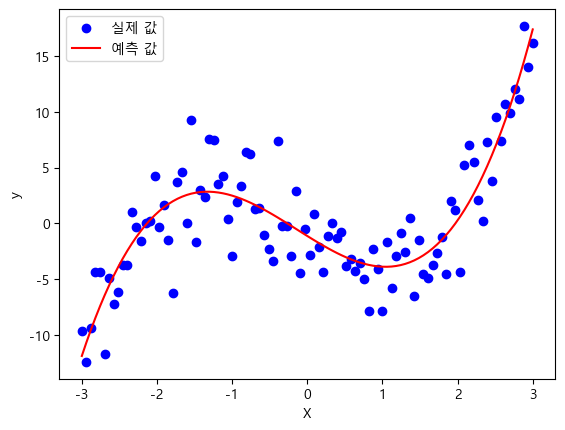

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
np.random.seed(0)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 특성 변환 
poly_feature = PolynomialFeatures
    
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 예측 값 계산
y_pred = model.predict(X_poly)

# 결과 시각화
plt.scatter(X, y, color='blue', label='실제 값')
plt.plot(X, y_pred, color='red', label='예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

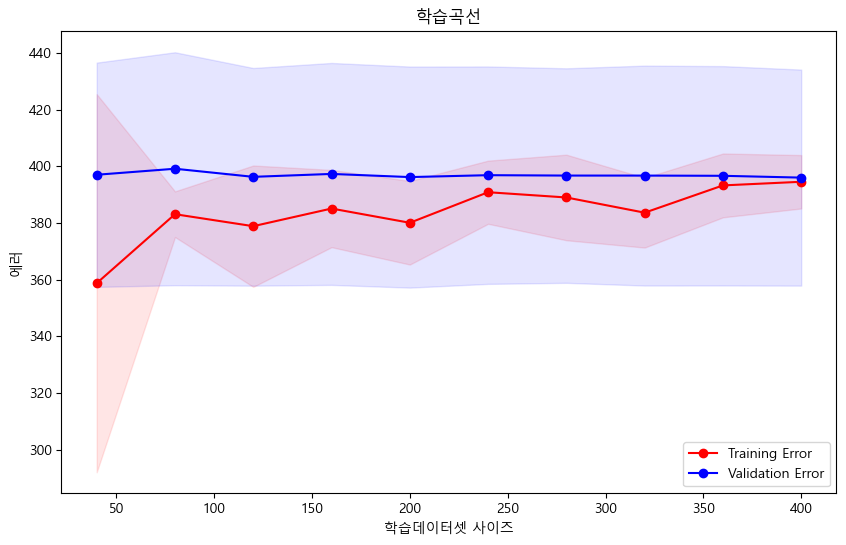

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve  # 학습곡선 개선 모델
from sklearn.linear_model import LinearRegression   # 선형회귀모델
from sklearn.datasets import make_regression        # 회귀용 예제 데이터셋

# 데이터 생성 (샘플 500개, 특징 1개, 노이즈 포함)
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, val_score = learning_curve(
    LinearRegression(),                     # 선형회귀모델
    X, y,                                   # 입력(X), 타겟(y)
    cv = 5,                                 # 교차검증 5-fold
    scoring = 'neg_mean_squared_error',     # MSE 사용
    train_sizes=np.linspace(0.1, 1.0,10)    # 0.1~1.0까지 10단계로 점차적으로 증가
)

# 평균과 표준편차 계산
train_mean = -train_scores.mean(axis=1)     # train scores 평균(MES). 음수를 양수로 변경
train_std = train_scores.std(axis=1)        # train_score 표준편차
val_mean = -val_score.mean(axis=1)          # validation scores 평균(MES). 음수를 양수로 변경
val_std = val_score.std(axis=1)            # validation scores 표준편차

# 학습곡선 시각화
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Error', color='red')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Error', color='blue')

# 표준편차 영역 (불확실성 영역) 표시
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='red')   # 훈련 에러 신뢰구간
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')    # 검증 에러 신뢰구간

plt.xlabel("학습데이터셋 사이즈")
plt.ylabel("에러")
plt.title("학습곡선")
plt.legend()
plt.show()

In [1]:
import math

p = [1, 2]
q = [4, 6]

distance = math.dist(p, q)
print(distance)   # 출력: 5.0

5.0


In [ ]:
# 맨해튼 거리
p = [1, 2]
q = [4, 6]

manhattan = sum(abs(pi - qi) for pi, qi in zip(p, q))
print(manhattan)   # 출력: 7

7


In [ ]:
import numpy as np

p = np.array([1, 2])
q = np.array([2, 3])

cos_sim = np.dot(p, q) / (np.linalg.norm(p) * np.linalg.norm(q))
print(round(cos_sim, 3))   # 출력: 0.992

0.992


In [ ]:
import numpy as np
from scipy.spatial.distance import mahalanobis

# 샘플 데이터(공분산 계산용)
data = np.array([
    [1, 2],
    [2, 2],
    [3, 4]
])

p = np.array([1, 2])
q = np.array([3, 4])

cov = np.cov(data.T)               # 공분산 행렬
inv_cov = np.linalg.inv(cov)       # 공분산 역행렬

dist = mahalanobis(p, q, inv_cov)
print(round(dist, 3))  # 예: 2

2.0


In [ ]:
# 시그모이드 함수
import numpy as np

theta = np.array([0.5, 1.0])   # 가중치
x = np.array([1, 2])           # 입력 데이터

z = theta @ x                  # 선형 조합 (θ^T x)
sigmoid = 1 / (1 + np.exp(-z)) # 시그모이드 함수

print(round(sigmoid, 3))  # 예: 0.924

0.924


In [ ]:
import numpy as np

# 간단한 데이터 (x: 특성, y: 레이블)
x = np.array([0.2, 0.8, 1.5])
y = np.array([0, 1, 1])

theta = 1.0                            # 임의 가중치
z = theta * x
h = 1 / (1 + np.exp(-z))               # 시그모이드

# Log Loss 계산
log_loss = -np.mean(y*np.log(h) + (1-y)*np.log(1-h))
print(round(log_loss, 3))              # 예: 0.457
 
# 예측 (threshold=0.5)
pred = (h >= 0.5).astype(int)
print(pred)                             # 예: [0 1 1]

0.457
[1 1 1]


In [7]:
import numpy as np

x = np.array([1.0, 0.5])   # 입력 특징

# 출력 1: 질병 유무 (이진 분류 → 시그모이드)
theta_disease = np.array([1.2, -0.8])
z1 = theta_disease @ x
disease_prob = 1 / (1 + np.exp(-z1))

# 출력 2: 중증도 (4개 클래스 → 소프트맥스)
theta_severity = np.array([
    [0.5, 1.0],
    [1.0, -0.2],
    [-0.5, 0.7],
    [0.2, 0.1]
])
z2 = theta_severity @ x
exp_scores = np.exp(z2)
severity_prob = exp_scores / np.sum(exp_scores)

print("질병 확률:", round(disease_prob, 3))
print("중증도 확률:", np.round(severity_prob, 3))

질병 확률: 0.69
중증도 확률: [0.371 0.336 0.118 0.175]


In [8]:
import numpy as np

y_true = np.array([1, 0, 1, 1, 0])   # 실제값
y_pred = np.array([1, 0, 0, 1, 0])   # 예측값

TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

accuracy = (TP + TN) / len(y_true)
print("Accuracy:", round(accuracy, 3))   # 예: 0.8

Accuracy: 0.8


In [9]:
import numpy as np

y_true = np.array([1, 0, 1, 1, 0])
y_pred = np.array([1, 1, 0, 1, 0])

# Confusion Matrix 요소 계산
TP = np.sum((y_true == 1) & (y_pred == 1))  # 2
TN = np.sum((y_true == 0) & (y_pred == 0))  # 1
FP = np.sum((y_true == 0) & (y_pred == 1))  # 1
FN = np.sum((y_true == 1) & (y_pred == 0))  # 1

print(f"TP={TP}, FP={FP}, FN={FN}, TN={TN}")

TP=2, FP=1, FN=1, TN=1


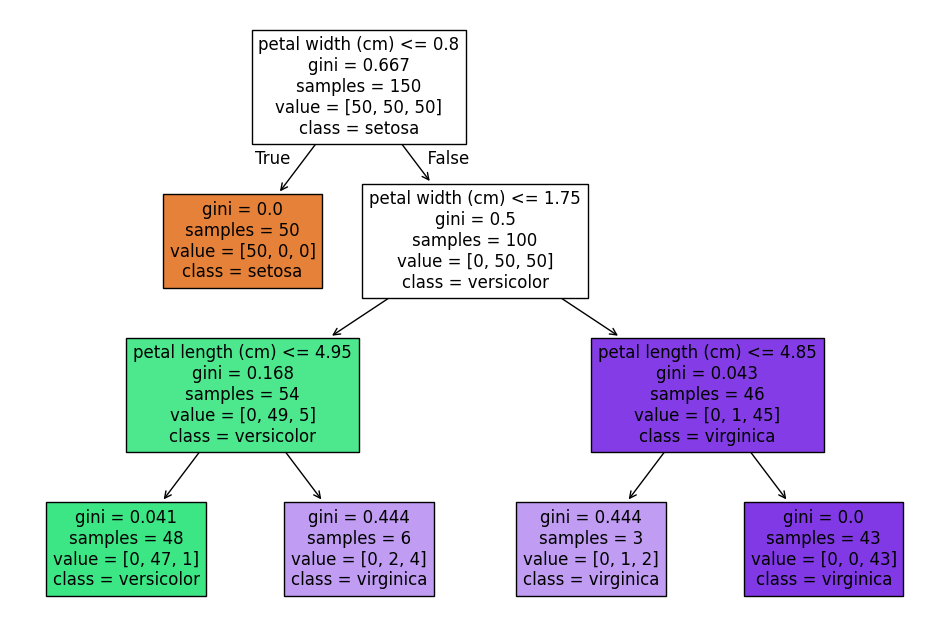

In [1]:
# 결정트리 시각화
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 데이터 로드 및 모델 학습
iris = load_iris()
X, y = iris.data, iris.target
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [8]:
from collections import Counter

# 어떤 리프 노드에 도달한 샘플들의 실제 클래스
leaf_samples = ['A', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A']

counts = Counter(leaf_samples)
total = len(leaf_samples)

counts.items()

dict_items([('A', 8), ('B', 2)])

In [9]:
probs = {cls: cnt / total for cls, cnt in counts.items()}
print(probs)   # 예: {'A': 0.8, 'B': 0.2}

{'A': 0.8, 'B': 0.2}


In [ ]:
from collections import Counter

# 한 노드에 있는 샘플들의 클래스
node = ['A', 'A', 'B', 'A', 'B', 'A']

counts = Counter(node)  # A: 4, B : 2
total = len(node)   # 6

gini = 1 - sum((cnt/total)**2 for cnt in counts.values())
print(round(gini, 3))   # 예: 0.444

0.444


In [ ]:
import math
from collections import Counter

# 한 노드에 있는 샘플의 클래스 구성
node = ['A', 'A', 'B', 'A', 'B', 'A']   # A :4, B: 2

counts = Counter(node)  # A :4, B: 2
total = len(node)   # 6

entropy = -sum((cnt/total) * math.log2(cnt/total) for cnt in counts.values())
print(round(entropy, 3))   # 예: 0.918

0.918


In [15]:
import math
from collections import Counter

def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    return -sum((c/total) * math.log2(c/total) for c in counts.values())

# 전체 데이터의 클래스
D = ['A', 'A', 'B', 'A', 'B', 'A']   # 엔트로피 계산
H_D = entropy(D)

# 속성 A로 분할한 경우
Dv1 = ['A', 'A', 'A']   # 예: feature A = 0 그룹
Dv2 = ['B', 'A', 'B']   # 예: feature A = 1 그룹

H_split = (len(Dv1)/len(D)) * entropy(Dv1) + \
          (len(Dv2)/len(D)) * entropy(Dv2)

IG = H_D - H_split

print("분할 후 엔트로피", H_split)

print("정보 이득:", round(IG, 3))

분할 후 엔트로피 0.4591479170272448
정보 이득: 0.459


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 규제 없음 (과적합 가능)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
print("규제 없음 정확도:", model1.score(X_test, y_test))

# 최대 깊이 제한
model2 = DecisionTreeClassifier(max_depth=2, random_state=42)
model2.fit(X_train, y_train)
print("max_depth=2 정확도:", model2.score(X_test, y_test))

규제 없음 정확도: 1.0
max_depth=2 정확도: 0.9777777777777777


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np

# 회귀용 california housing 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 규제 없는 회귀 트리
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 첫 번째 테스트 샘플 예측
pred = model.predict([X_test[0]])
print("예측값:", np.round(pred[0], 3))
print("실제값:", y_test[0])

예측값: 0.414
실제값: 0.477


가지치기 없음: 1.0


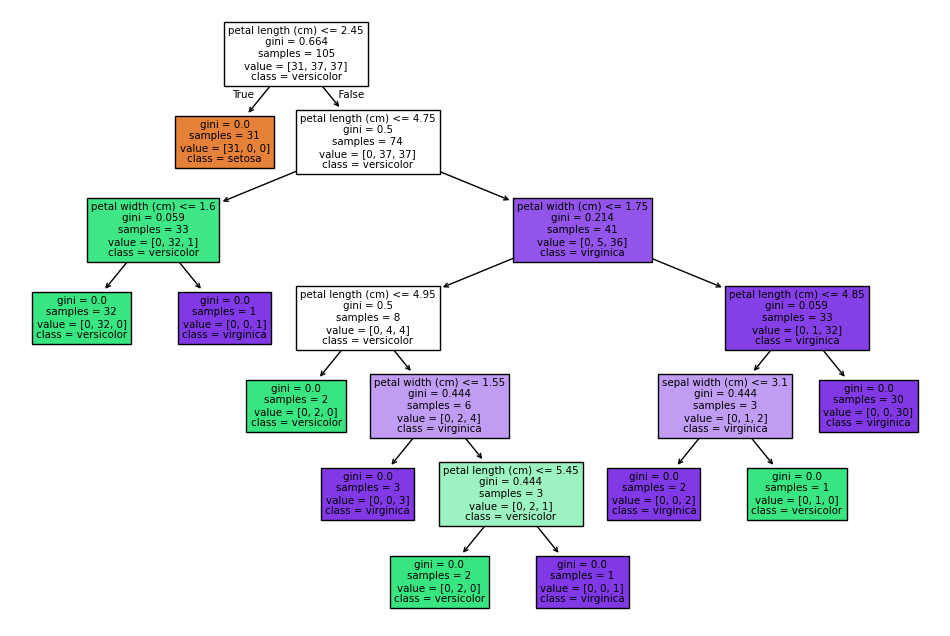

In [31]:
# 가지치기 효과 비교
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 가지치기 없음 (과적합 가능)
model_full = DecisionTreeClassifier(random_state=42)
model_full.fit(X_train, y_train)
print("가지치기 없음:", model_full.score(X_test, y_test))

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(model_full, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

max_depth=2 가지치기: 0.9777777777777777


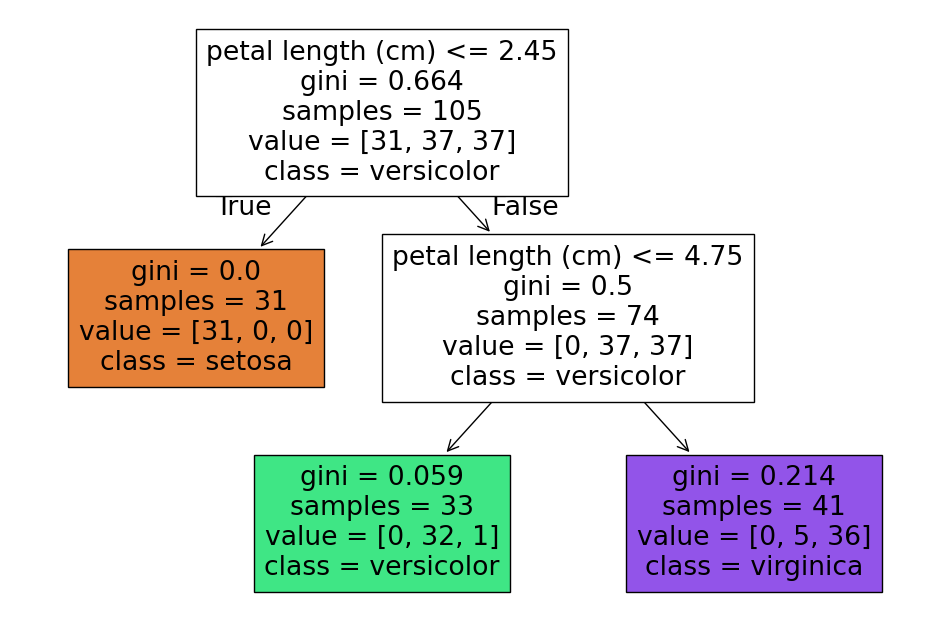

In [32]:
# 사전 가지치기: 트리 깊이 제한
model_pruned = DecisionTreeClassifier(max_depth=2, random_state=42)
model_pruned.fit(X_train, y_train)
print("max_depth=2 가지치기:", model_pruned.score(X_test, y_test))

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(model_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

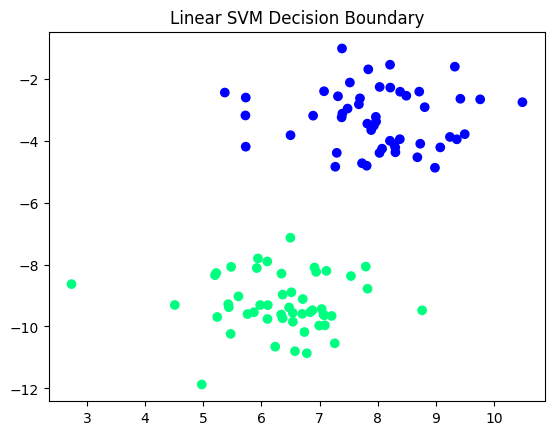

In [ ]:
# 선형 SVM
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_blobs(n_samples=100, centers=2, random_state=6) # 두 개의 군집(클래스) 데이터 생성

# 선형 SVM 모델 학습
model = SVC(kernel='linear')    # 선형 커널을 사용하는 SVM 분류기
model.fit(X, y)

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title("Linear SVM Decision Boundary")
plt.show()

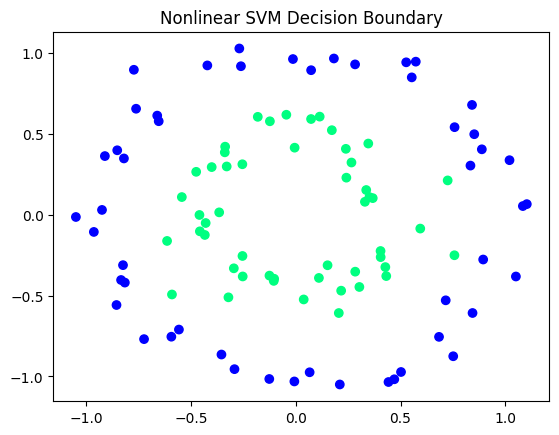

In [ ]:
# 비선형 SVM모델
from sklearn.svm import SVC                 # SVM 분류 모델
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_circles(
    n_samples=100,      # 데이터 100개
    factor=0.5,         # 바깥 원의 반지름 대비 안쪽 원의 반지름
    noise=0.1           # 데이터 섞이는 노이즈
)          

# 비선형 SVM 모델 학습 (RBF 커널)
model = SVC(
    kernel='rbf',       # RBF(가우시안) 커널 -> 비선형 분류
    gamma=1             # 결정 경계의 굴곡
)      
model.fit(X, y)

# 시각화
plt.scatter(
    X[:, 0],    # X의 첫번쨰
    X[:, 1], 
    c=y, 
    cmap='winter')
plt.title("Nonlinear SVM Decision Boundary")
plt.show()

[[ 0.        ]
 [ 0.1010101 ]
 [ 0.2020202 ]
 [ 0.3030303 ]
 [ 0.4040404 ]
 [ 0.50505051]
 [ 0.60606061]
 [ 0.70707071]
 [ 0.80808081]
 [ 0.90909091]
 [ 1.01010101]
 [ 1.11111111]
 [ 1.21212121]
 [ 1.31313131]
 [ 1.41414141]
 [ 1.51515152]
 [ 1.61616162]
 [ 1.71717172]
 [ 1.81818182]
 [ 1.91919192]
 [ 2.02020202]
 [ 2.12121212]
 [ 2.22222222]
 [ 2.32323232]
 [ 2.42424242]
 [ 2.52525253]
 [ 2.62626263]
 [ 2.72727273]
 [ 2.82828283]
 [ 2.92929293]
 [ 3.03030303]
 [ 3.13131313]
 [ 3.23232323]
 [ 3.33333333]
 [ 3.43434343]
 [ 3.53535354]
 [ 3.63636364]
 [ 3.73737374]
 [ 3.83838384]
 [ 3.93939394]
 [ 4.04040404]
 [ 4.14141414]
 [ 4.24242424]
 [ 4.34343434]
 [ 4.44444444]
 [ 4.54545455]
 [ 4.64646465]
 [ 4.74747475]
 [ 4.84848485]
 [ 4.94949495]
 [ 5.05050505]
 [ 5.15151515]
 [ 5.25252525]
 [ 5.35353535]
 [ 5.45454545]
 [ 5.55555556]
 [ 5.65656566]
 [ 5.75757576]
 [ 5.85858586]
 [ 5.95959596]
 [ 6.06060606]
 [ 6.16161616]
 [ 6.26262626]
 [ 6.36363636]
 [ 6.46464646]
 [ 6.56565657]
 [ 6.66666

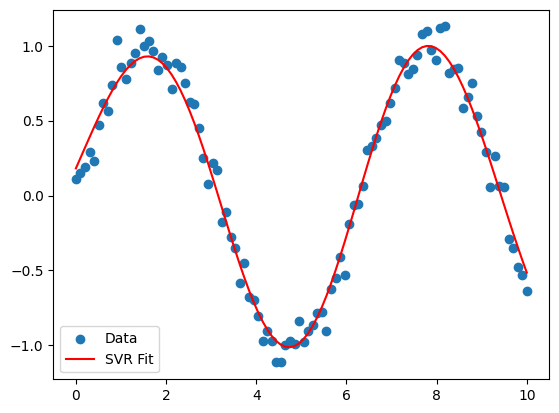

In [ ]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.linspace(0, 10, 100).reshape(-1, 1)      # 0~10까지 구간 100개를 1차원 형태로 변환
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])    # 사인함수 + 노이즈 (회귀 대상)

print(X)
print()
print(y)

# SVM 회귀 모델 학습
model = SVR(
    kernel='rbf',   # ㅂ선형 회귀릘 위한 RBF 커널
    C=1,            # 오차에 대한 패널티 강도 (크면 경계가 구불구불 -> 과적합 가능성 / 작으면 경계가 부드러워짐)
                    # 0 < X < ㅜ람재 (하이퍼파라미터 최적화로 찾는다. C = [0.01,0.1,1,10,100])
    epsilon=0.1     # 오차 허용 구간 (크면 더 많은 뎅터를 혀용한다)
    )
model.fit(X, y)

# 예측 및 시각화
y_pred = model.predict(X)
plt.scatter(X, y, label="Data")                     # 실제 데이터
plt.plot(X, y_pred, color='red', label="SVR Fit")   # SVR 모델의 회귀 곡선
plt.legend()
plt.show()

SVR 쓰기 좋은 상황
- 데이터에 약간의 노이즈가 있는 경우
- 복잡한 곡선 형태의 관계
- 선형회귀 못 쓸때

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 준비
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 개별 모델
log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svc_clf = SVC(probability=True)

# 투표 기반 분류기
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', tree_clf),
    ('svc', svc_clf)],
    voting='soft'  # soft 또는 hard
)
voting_clf.fit(X_train, y_train)

print("Accuracy:", voting_clf.score(X_test, y_test))

Accuracy: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',  # 특성의 일부만 사용
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

Stacking Accuracy: 1.0


In [3]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", gb_clf.score(X_test, y_test))

Gradient Boosting Accuracy: 1.0


In [6]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))
    ],
    final_estimator=LogisticRegression(),  # 메타 모델
    cv=5  # 교차 검증
)
stacking_clf.fit(X_train, y_train)
print("Stacking Accuracy:", stacking_clf.score(X_test, y_test))

Stacking Accuracy: 1.0


Decision Tree를 단일로 사용한다 - > 일반화성능이 낮음
앙상블 -> 분산을 억제(=과적합 위험을 낮춤)

배깅 -> 병렬로 모델 학습. 결과를 다수결 또는 평균으로 내보냄 - 랜덤포레스트
부스팅- > 순차구조. 병렬을 직렬로 학습, 결과를 마직막에 내보냄(점전직 성능 향상)
스태킹 -> 병렬로 모델 학습, 결과를 하나의 메타모델이 판단